# ISYS2407 Information Systems Solutions & Design

# Exploratory Data Analysis

# ISYS2407 Information Systems Solutions & Design

# Assignment 3

# Data Cleaning

#### Student name: Thao Vy LE

#### Student number: S3970577

## 1 Import Library

In [29]:
# Importing libraries
import numpy as np
import pandas as pd

# Libraries for further processing of the data
from sklearn.impute import SimpleImputer # for assigning missing values
# Library forn saving a python object to file
import joblib 

import matplotlib.pyplot as plt
# The next statement instructs matplotlib to plot the graphs inside the notebook
%matplotlib inline 
import seaborn as sns

In [6]:
personal_loan_df = pd.read_csv("personal_loan.csv")

## 2 Check info

In [7]:
personal_loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         6000 non-null   int64  
 1   age                 5620 non-null   float64
 2   yrs_experience      5636 non-null   float64
 3   family_size         5615 non-null   float64
 4   education_level     6000 non-null   object 
 5   income              5623 non-null   float64
 6   mortgage_amt        6000 non-null   int64  
 7   credit_card_acct    6000 non-null   object 
 8   credit_card_spend   6000 non-null   float64
 9   share_trading_acct  6000 non-null   int64  
 10  fixed_deposit_acct  6000 non-null   int64  
 11  online_acct         6000 non-null   object 
 12  personal_loan       6000 non-null   object 
dtypes: float64(5), int64(4), object(4)
memory usage: 609.5+ KB


### 2.1 Check the object created

In [8]:
# What is the data type?
#type(diabetes_df)
# or
print(type(personal_loan_df))

<class 'pandas.core.frame.DataFrame'>


### 2.2 Check some display data 

In [9]:
# By default, head() will display 5 rows
personal_loan_df.head()

,customer_id,age,yrs_experience,family_size,education_level,income,mortgage_amt,credit_card_acct,credit_card_spend,share_trading_acct,fixed_deposit_acct,online_acct,personal_loan
0,3815,40.0,9.0,3.0,Graduate,60.0,0,yes,1.7,0,0,yes,no
1,5737,65.0,27.0,4.0,Advanced or Professional,36.0,90,no,0.0,0,0,yes,no
2,4209,61.0,3.0,2.0,Undergraduate,145.0,314,no,0.0,0,1,yes,yes
3,4734,29.0,14.0,1.0,Undergraduate,52.0,0,no,0.0,1,0,yes,no
4,2551,43.0,23.0,4.0,Graduate,33.0,0,no,0.0,0,0,yes,no


### 2.3 Check the number of rows and columns in the data frame 

In [10]:
print(personal_loan_df.shape)
print(personal_loan_df.shape[0])
print(personal_loan_df.shape[1])

(6000, 13)
6000
13


### 2.4 Check data type only

In [11]:
personal_loan_df.dtypes

customer_id             int64
age                   float64
yrs_experience        float64
family_size           float64
education_level        object
income                float64
mortgage_amt            int64
credit_card_acct       object
credit_card_spend     float64
share_trading_acct      int64
fixed_deposit_acct      int64
online_acct            object
personal_loan          object
dtype: object

### 2.5 Delete duplicated rows

In [12]:
print(personal_loan_df.shape)

personal_loan_df.drop_duplicates(inplace=True) # will keep first copy

personal_loan_df.reset_index(drop=True, inplace=True) # reset index to default integer index

# Check
print(personal_loan_df.shape)

(6000, 13)
(6000, 13)


## 3 Handling missing values with median  


### 3.1 Replace missing value with median

In [ ]:
# Count of missing values in the whole dataframe by column

In [13]:
personal_loan_df.isnull().sum()

customer_id             0
age                   380
yrs_experience        364
family_size           385
education_level         0
income                377
mortgage_amt            0
credit_card_acct        0
credit_card_spend       0
share_trading_acct      0
fixed_deposit_acct      0
online_acct             0
personal_loan           0
dtype: int64

In [32]:
columns = ['age', 'yrs_experience', 'family_size','income','mortgage_amt']

# Create SimpleImputer object to replace missing values with median
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')

for col in columns:
    # Using SimpleImputer to replace all missing values in column with median value
    personal_loan_df[col] = imp_median.fit_transform(personal_loan_df[col].values.reshape(-1, 1))

### 3.2 Check missing values after replacing with median

In [33]:
# Check - there should be zero percent missing values in all columns
print("\nPercentage of missing values after imputation:")
print(round(personal_loan_df.isna().mean() * 100, 4))

# Display final information about the DataFrame
print("\nFinal DataFrame after imputation:")
print(personal_loan_df.info())


Percentage of missing values after imputation:
customer_id           0.0
age                   0.0
yrs_experience        0.0
family_size           0.0
education_level       0.0
income                0.0
mortgage_amt          0.0
credit_card_acct      0.0
credit_card_spend     0.0
share_trading_acct    0.0
fixed_deposit_acct    0.0
online_acct           0.0
personal_loan         0.0
dtype: float64

Final DataFrame after imputation:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         6000 non-null   int64  
 1   age                 6000 non-null   float64
 2   yrs_experience      6000 non-null   float64
 3   family_size         6000 non-null   float64
 4   education_level     6000 non-null   int64  
 5   income              6000 non-null   float64
 6   mortgage_amt        6000 non-null   float64
 7   credit_card

## 4 Fix data type: Encode all objects values


### 4.1 Binary Encoding for credit_card_acct, online_acct, personal_loan: Yes and No

In [35]:
# Define the mapping dictionary
binary_map = {'yes': 1, 'no': 0}

# Apply the mapping using replace()
personal_loan_df['credit_card_acct'] = personal_loan_df['credit_card_acct'].replace(binary_map)
personal_loan_df['online_acct'] = personal_loan_df['online_acct'].replace(binary_map)
personal_loan_df['personal_loan'] = personal_loan_df['personal_loan'].replace(binary_map)


### 4.2 Ordinal Encoding for education_level: Undergraduate, Graduate, Advanced or Professional

In [36]:
# Define the mapping dictionary for ordinal data
education_order = {
    'Undergraduate': 0, 
    'Graduate': 1, 
    'Advanced or Professional': 2
}

# Apply the mapping using replace()
personal_loan_df['education_level'] = personal_loan_df['education_level'].replace(education_order)


In [37]:
# Check unique encoded values
print(personal_loan_df['education_level'].unique())
print(personal_loan_df['credit_card_acct'].unique())
print(personal_loan_df['online_acct'].unique())
print(personal_loan_df['personal_loan'].unique())

#Display some rows to double check the assigned values 
personal_loan_df.head()

[1 2 0]
[1 0]
[1 0]
[0 1]


,customer_id,age,yrs_experience,family_size,education_level,income,mortgage_amt,credit_card_acct,credit_card_spend,share_trading_acct,fixed_deposit_acct,online_acct,personal_loan
0,3815,40.0,9.0,3.0,1,60.0,0.0,1,0.0,0,0,1,0
1,5737,65.0,27.0,4.0,2,36.0,90.0,0,0.0,0,0,1,0
2,4209,61.0,3.0,2.0,0,145.0,0.0,0,0.0,0,1,1,1
3,4734,29.0,14.0,1.0,0,52.0,0.0,0,0.0,1,0,1,0
4,2551,43.0,23.0,4.0,1,33.0,0.0,0,0.0,0,0,1,0


In [38]:
# Check data type again to ensure all columns are encoded before training 
personal_loan_df.dtypes

customer_id             int64
age                   float64
yrs_experience        float64
family_size           float64
education_level         int64
income                float64
mortgage_amt          float64
credit_card_acct        int64
credit_card_spend     float64
share_trading_acct      int64
fixed_deposit_acct      int64
online_acct             int64
personal_loan           int64
dtype: object

## 5 Outliers

### 5.1 Single box plot

<Axes: xlabel='credit_card_spend'>

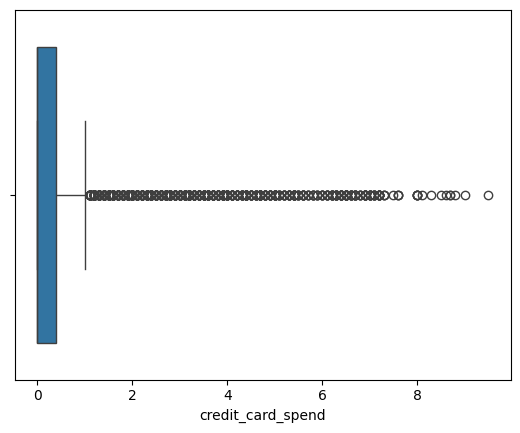

In [21]:
# Credit card spending outliers
sns.boxplot(x=personal_loan_df["credit_card_spend"])

<Axes: xlabel='mortgage_amt'>

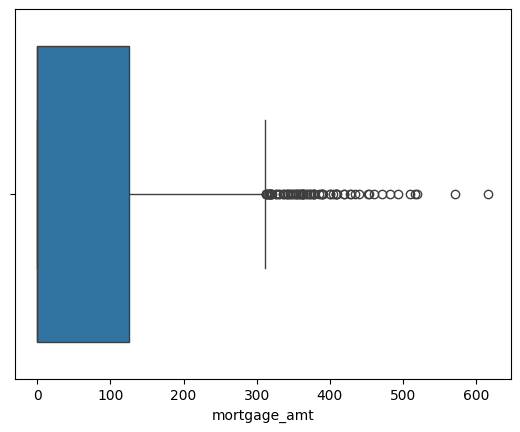

In [24]:
# Mortgage outliers
sns.boxplot(x=personal_loan_df["mortgage_amt"])

### 5.2 Subplots

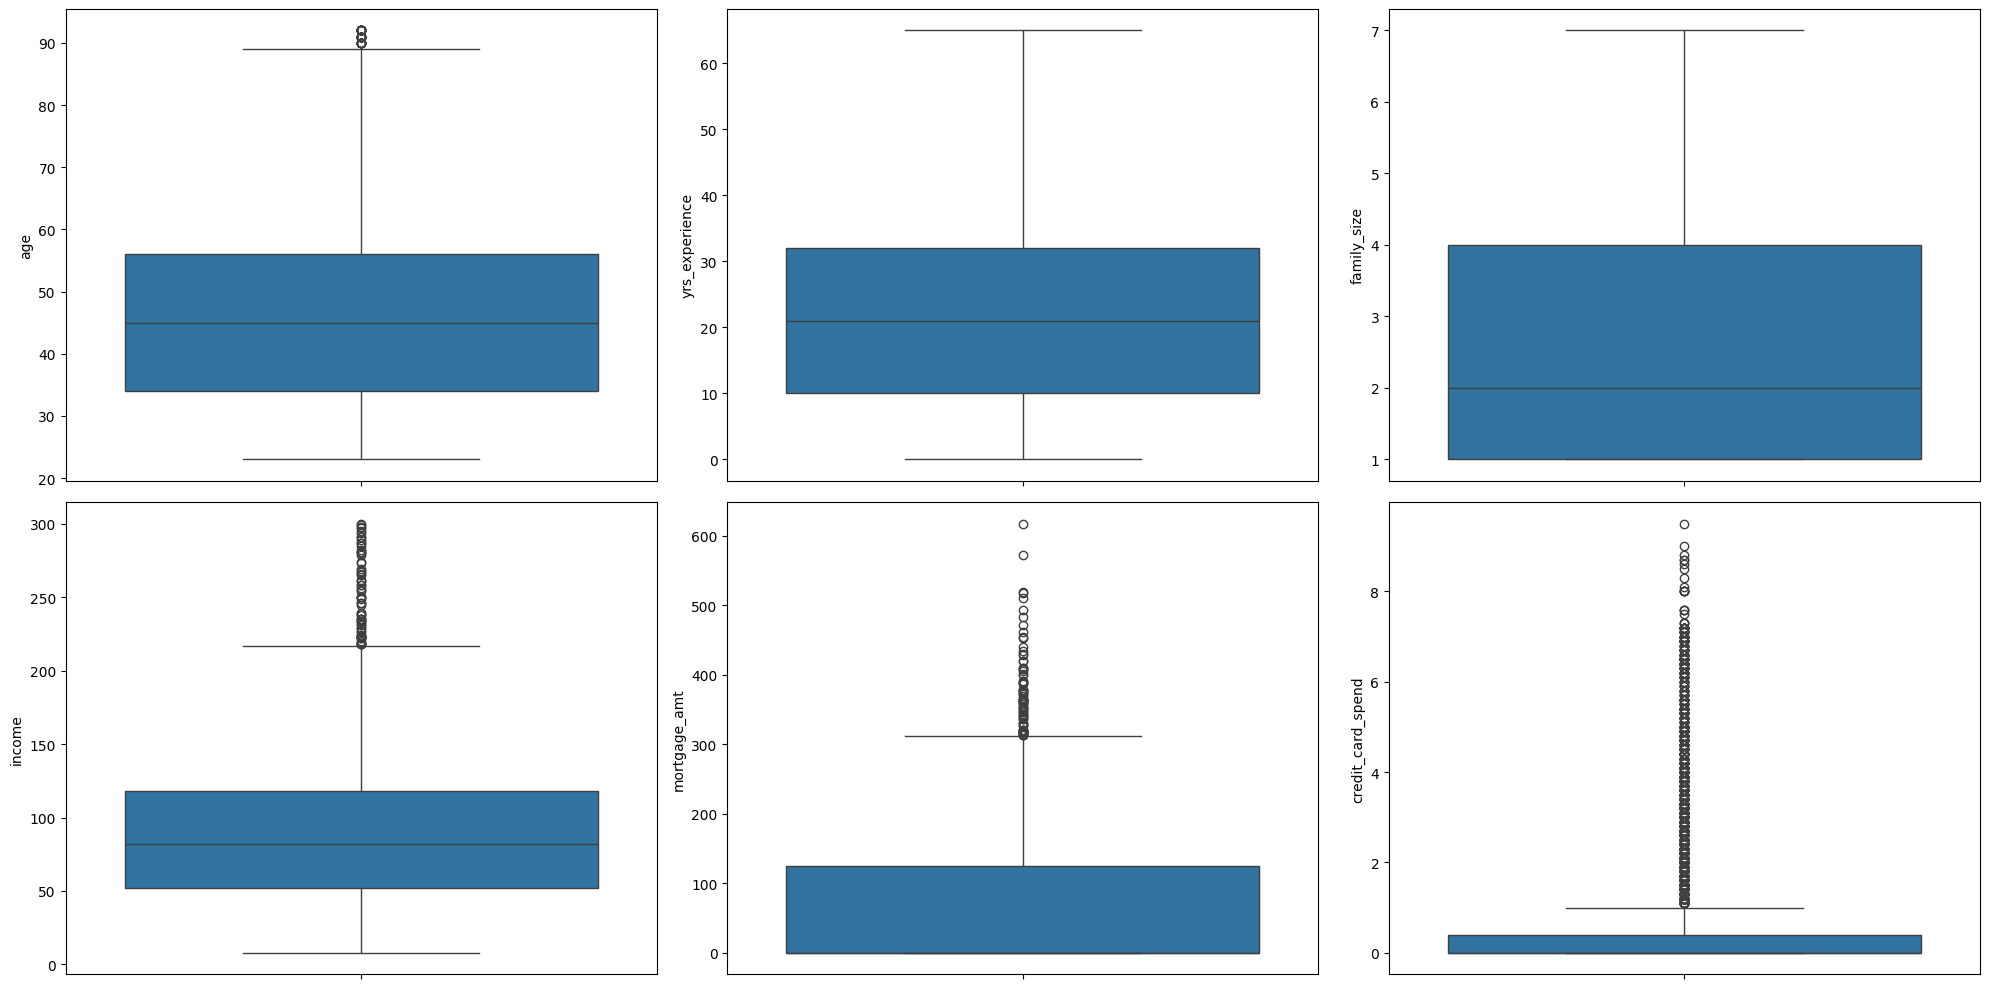

In [22]:
# import os
import os

# Function to detect outliers using IQR method
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    total = len(df[column])
    num_outliers = len(df[(df[column] < lower_bound) | (df[column] > upper_bound)])
    pc_outliers = round(num_outliers * 100 / total, 2)
    print(f"col: {col}, lower: {lower_bound}, upper: {upper_bound}")
    print(f"Num outliers: {num_outliers}, total rows: {total}, percent: {pc_outliers}")
    print()

fig, ax = plt.subplots(2,3, figsize=(20,10))  # 2 rows and 3 columns

# Row 0
ax1 = sns.boxplot(y=personal_loan_df["age"], ax=ax[0,0])  # rol 0 col 0
ax2 = sns.boxplot(y=personal_loan_df["yrs_experience"], ax=ax[0,1])  # col 1
ax3 = sns.boxplot(y=personal_loan_df["family_size"], ax=ax[0,2])  # rol 0 col 0
ax4 = sns.boxplot(y=personal_loan_df["income"], ax=ax[1,0])  # col 2
ax5 = sns.boxplot(y=personal_loan_df["mortgage_amt"], ax=ax[1,1])  # col 3
ax6 = sns.boxplot(y=personal_loan_df["credit_card_spend"], ax=ax[1,2])  # col 4


plt.tight_layout() 
plt.savefig('outliers-subplots.png', dpi=300) 
plt.show()

### 5.3 Check percentage Outliers

In [23]:
# Finding the percentages of outlier per columns
# Note: Outliers only apply to continuous numerical values - not to strings or numerical categories!
# So, be careful what you include in the list of column names

# Add Pregnancies to the list
columns = ['age', 'yrs_experience', 'family_size', 
           'income', 'mortgage_amt', 'credit_card_spend']
print(columns)
print()

for col in columns:
    percentile_25 = personal_loan_df[col].quantile(0.25)
    percentile_75 = personal_loan_df[col].quantile(0.75)
    iqr = percentile_75 - percentile_25 # Inter Quartile Range
    total = len(personal_loan_df[col])
    #total = personal_loan_df[col].shape[0] # also works

    # Determine the upper and lower boundaries for outliers
    # The lower and upper boundaries are less than the bottom whisker or greater than the top whisker
    #cut_off = iqr * 3    # three times IQR - for detecting extreme outliers
    cut_off = iqr * 1.5  # normally use 1.5 times IQR
    lower, upper = percentile_25 - cut_off, percentile_75 + cut_off
    print(f"col: {col}, lower: {lower}, upper: {upper}")

    # Count all values that are less than the lower boundary OR those that are greater than the upper boundary
    #num_outliers = personal_loan_df[(personal_loan_df[col] < lower) | (personal_loan_df[col] > upper)].count() 
    # returns a list of things
    num_outliers = len(personal_loan_df[(personal_loan_df[col] < lower) | (personal_loan_df[col] > upper)])
    
    pc_outliers = round(num_outliers*100/total,2)
    
    print(f"Num outliers: {num_outliers}, total rows: {total}, percent: {pc_outliers}")
    print()
    #diabetes_df.describe()
personal_loan_df.describe().T

['age', 'yrs_experience', 'family_size', 'income', 'mortgage_amt', 'credit_card_spend']

col: age, lower: 1.0, upper: 89.0
Num outliers: 49, total rows: 6000, percent: 0.82

col: yrs_experience, lower: -23.0, upper: 65.0
Num outliers: 0, total rows: 6000, percent: 0.0

col: family_size, lower: -3.5, upper: 8.5
Num outliers: 0, total rows: 6000, percent: 0.0

col: income, lower: -47.0, upper: 217.0
Num outliers: 70, total rows: 6000, percent: 1.17

col: mortgage_amt, lower: -187.5, upper: 312.5
Num outliers: 79, total rows: 6000, percent: 1.32

col: credit_card_spend, lower: -0.6000000000000001, upper: 1.0
Num outliers: 1089, total rows: 6000, percent: 18.15



,count,mean,std,min,25%,50%,75%,max
customer_id,6000.0,3027.886667,1723.488432,3.0,1553.75,3045.5,4511.0,6000.0
age,5620.0,45.556940,13.373778,23.0,34.00,45.0,56.0,92.0
yrs_experience,5636.0,21.182221,13.247945,0.0,10.00,21.0,32.0,65.0
family_size,5615.0,2.468566,1.215636,1.0,1.00,2.0,4.0,7.0
education_level,6000.0,0.893833,0.837265,0.0,0.00,1.0,2.0,2.0
income,5623.0,88.143873,48.736053,8.0,52.00,82.0,118.0,300.0
mortgage_amt,6000.0,67.585667,88.155099,0.0,0.00,0.0,125.0,617.0
credit_card_acct,6000.0,0.297167,0.457049,0.0,0.00,0.0,1.0,1.0
credit_card_spend,6000.0,0.627467,1.423450,0.0,0.00,0.0,0.4,9.5
share_trading_acct,6000.0,0.099167,0.298911,0.0,0.00,0.0,0.0,1.0


### 5.4 Replace outliers with median values

In [ ]:
#Credit_card_spend has the highest percent of outliers

In [25]:
# Using Inter Quartile Range (IQR) to detect outliers - for non-normal (non-Gaussian) distributions
columns = ['age', 'yrs_experience', 'family_size', 
           'income', 'mortgage_amt', 'credit_card_spend']

for col in columns:
    median_val = personal_loan_df[col].quantile(0.50)
    percentile_25 = personal_loan_df[col].quantile(0.25)
    percentile_75 = personal_loan_df[col].quantile(0.75)
    iqr = percentile_75 - percentile_25 # Inter Quartile Range
    
    # Determine the upper and lower boundaries for outliers
    # The lower and upper boundaries are less than the bottom whisker or greater than the top whisker
    #cut_off = iqr * 3    # three times IQR - for detecting extreme outliers
    cut_off = iqr * 1.5  # normally use 1.5 times IQR
    lower, upper = percentile_25 - cut_off, percentile_75 + cut_off
    print(f"col: {col}, lower: {lower}, upper: {upper},  median_val: {median_val}")
    
    # Replace all outliers in column with median value
    # Replace all values that are less than the lower boundary OR those that are greater than the upper boundary
    personal_loan_df[col] = np.where((personal_loan_df[col] < lower) | (personal_loan_df[col] > upper), median_val, personal_loan_df[col])
 
#diabetes_df.describe()
personal_loan_df.describe().T  # T means transpose - will transpose rows to column

col: age, lower: 1.0, upper: 89.0,  median_val: 45.0
col: yrs_experience, lower: -23.0, upper: 65.0,  median_val: 21.0
col: family_size, lower: -3.5, upper: 8.5,  median_val: 2.0
col: income, lower: -42.5, upper: 209.5,  median_val: 82.0
col: mortgage_amt, lower: -180.0, upper: 300.0,  median_val: 0.0
col: credit_card_spend, lower: 0.0, upper: 0.0,  median_val: 0.0


,count,mean,std,min,25%,50%,75%,max
customer_id,6000.0,3027.886667,1723.488432,3.0,1553.75,3045.5,4511.0,6000.0
age,5620.0,45.153915,12.669115,23.0,34.00,45.0,56.0,89.0
yrs_experience,5636.0,21.182221,13.247945,0.0,10.00,21.0,32.0,65.0
family_size,5615.0,2.468566,1.215636,1.0,1.00,2.0,4.0,7.0
education_level,6000.0,0.893833,0.837265,0.0,0.00,1.0,2.0,2.0
income,5623.0,85.533523,44.347832,8.0,52.00,82.0,115.0,209.0
mortgage_amt,6000.0,61.496000,79.155494,0.0,0.00,0.0,119.0,300.0
credit_card_acct,6000.0,0.297167,0.457049,0.0,0.00,0.0,1.0,1.0
credit_card_spend,6000.0,0.000000,0.000000,0.0,0.00,0.0,0.0,0.0
share_trading_acct,6000.0,0.099167,0.298911,0.0,0.00,0.0,0.0,1.0


In [26]:
personal_loan_df.head() 

,customer_id,age,yrs_experience,family_size,education_level,income,mortgage_amt,credit_card_acct,credit_card_spend,share_trading_acct,fixed_deposit_acct,online_acct,personal_loan
0,3815,40.0,9.0,3.0,1,60.0,0.0,1,0.0,0,0,1,0
1,5737,65.0,27.0,4.0,2,36.0,90.0,0,0.0,0,0,1,0
2,4209,61.0,3.0,2.0,0,145.0,0.0,0,0.0,0,1,1,1
3,4734,29.0,14.0,1.0,0,52.0,0.0,0,0.0,1,0,1,0
4,2551,43.0,23.0,4.0,1,33.0,0.0,0,0.0,0,0,1,0


In [39]:
# Last Check again with NaN value- finalize training pickled dataset
print("\nPercentage of missing values after imputation:")
print(round(personal_loan_df.isna().mean() * 100, 4))

# Display final information about the DataFrame
print("\nFinal DataFrame after imputation:")
print(personal_loan_df.info())


Percentage of missing values after imputation:
customer_id           0.0
age                   0.0
yrs_experience        0.0
family_size           0.0
education_level       0.0
income                0.0
mortgage_amt          0.0
credit_card_acct      0.0
credit_card_spend     0.0
share_trading_acct    0.0
fixed_deposit_acct    0.0
online_acct           0.0
personal_loan         0.0
dtype: float64

Final DataFrame after imputation:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         6000 non-null   int64  
 1   age                 6000 non-null   float64
 2   yrs_experience      6000 non-null   float64
 3   family_size         6000 non-null   float64
 4   education_level     6000 non-null   int64  
 5   income              6000 non-null   float64
 6   mortgage_amt        6000 non-null   float64
 7   credit_card

In [41]:
# Save the object as a pickle in a file 
joblib.dump(personal_loan_df, 'cleaned_personal_loan.pkl') 
  
# In the other notebook    
# Load the model from the file 
#personal_loan_df = joblib.load('cleaned_personal_loan.pkl') 

['cleaned_personal_loan.pkl']